In [84]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pylab as plt

In [222]:
cars=pd.read_csv("cars-dataset.csv")
cars.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [137]:
cars.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [140]:
cars.shape

(398, 8)

In [223]:
cars.describe(include='all')

,car name,cyl,disp,hp,wt,acc,yr,mpg
count,398,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000
unique,305,NaN,NaN,94,NaN,NaN,NaN,NaN
top,ford pinto,NaN,NaN,150,NaN,NaN,NaN,NaN
freq,6,NaN,NaN,22,NaN,NaN,NaN,NaN
mean,NaN,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,23.514573
std,NaN,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,7.815984
min,NaN,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,9.000000
25%,NaN,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,17.500000
50%,NaN,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,23.000000
75%,NaN,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,29.000000


In [225]:
#Removal of Non Numeric values
cars.dropna(inplace=True) 

In [228]:
# conversion data  types of hp & wt  columns into float
cars['hp']=pd.to_numeric(cars.hp,errors='coerce')
cars['hp']=cars['hp'].astype('float64')
cars['wt']=cars['wt'].astype('float64')

In [229]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
wt          398 non-null float64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(5), int64(2), object(1)
memory usage: 28.0+ KB


In [230]:
cars[cars.isnull().any(axis=1)]

,car name,cyl,disp,hp,wt,acc,yr,mpg
32,ford pinto,4,98.0,NaN,2046.0,19.0,71,25.0
126,ford maverick,6,200.0,NaN,2875.0,17.0,74,21.0
330,renault lecar deluxe,4,85.0,NaN,1835.0,17.3,80,40.9
336,ford mustang cobra,4,140.0,NaN,2905.0,14.3,80,23.6
354,renault 18i,4,100.0,NaN,2320.0,15.8,81,34.5
374,amc concord dl,4,151.0,NaN,3035.0,20.5,82,23.0


In [231]:
cars.describe

<bound method NDFrame.describe of                               car name  cyl   disp     hp      wt   acc  yr  \
0            chevrolet chevelle malibu    8  307.0  130.0  3504.0  12.0  70   
1                    buick skylark 320    8  350.0  165.0  3693.0  11.5  70   
2                   plymouth satellite    8  318.0  150.0  3436.0  11.0  70   
3                        amc rebel sst    8  304.0  150.0  3433.0  12.0  70   
4                          ford torino    8  302.0  140.0  3449.0  10.5  70   
5                     ford galaxie 500    8  429.0  198.0  4341.0  10.0  70   
6                     chevrolet impala    8  454.0  220.0  4354.0   9.0  70   
7                    plymouth fury iii    8  440.0  215.0  4312.0   8.5  70   
8                     pontiac catalina    8  455.0  225.0  4425.0  10.0  70   
9                   amc ambassador dpl    8  390.0  190.0  3850.0   8.5  70   
10                 dodge challenger se    8  383.0  170.0  3563.0  10.0  70   
11                

In [238]:
cars1=cars.drop('car name',axis=1)
cars2=cars1.drop('hp',axis=1)
cars2.head()

,cyl,disp,wt,acc,yr,mpg
0,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.706439
1,1.498191,1.503514,0.854333,-1.477038,-1.627426,-1.090751
2,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.706439
3,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.962647
4,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.834543


## KMeans Clustering

In [193]:
from scipy.stats import zscore

In [239]:
cars2=cars2.apply(zscore)
#pop_cars.head()
pop_cars=cars.pop('car name')
cars=cars2.join(pop_cars)
cars.head()

,cyl,disp,wt,acc,yr,mpg,car name
0,1.498191,1.090604,0.630870,-1.295498,-1.627426,-0.706439,chevrolet chevelle malibu
1,1.498191,1.503514,0.854333,-1.477038,-1.627426,-1.090751,buick skylark 320
2,1.498191,1.196232,0.550470,-1.658577,-1.627426,-0.706439,plymouth satellite
3,1.498191,1.061796,0.546923,-1.295498,-1.627426,-0.962647,amc rebel sst
4,1.498191,1.042591,0.565841,-1.840117,-1.627426,-0.834543,ford torino


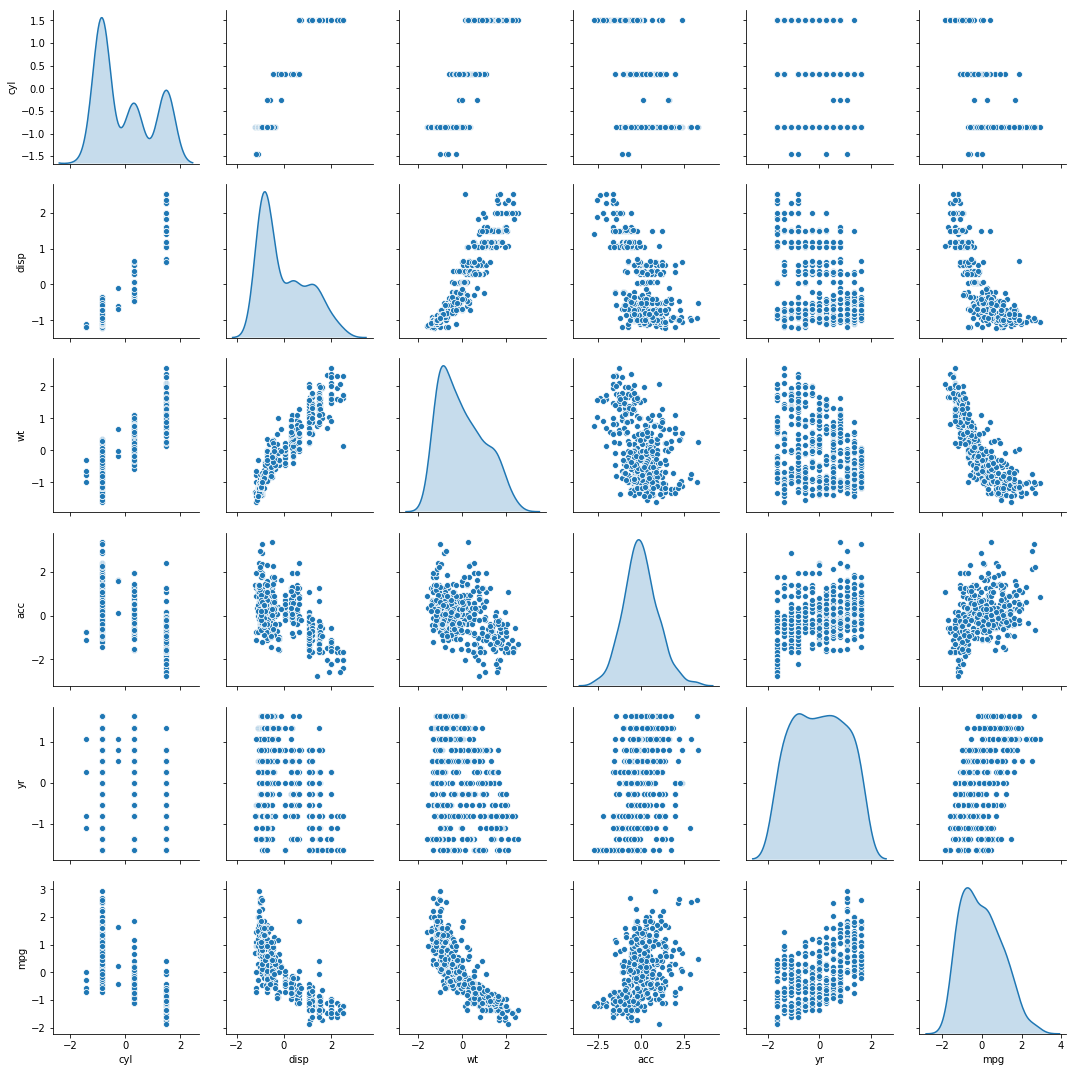

In [240]:
import seaborn as sns
sns.pairplot(cars2,diag_kind='kde')

In [206]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistorsion=[]

In [207]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(cars2)
    prediction=model.predict(cars2)
    meanDistorsion.append(sum(np.min(cdist(cars2,model.cluster_centers_, 'euclidean'), axis=1)) / cars2.shape[0])

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

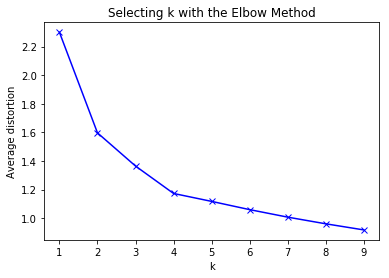

In [208]:
plt.plot(clusters, meanDistorsion, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Though the bend is not coming out clearly as there are many bends, let us look at 2 clusters and 3 clusters

In [209]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(cars2)
prediction=final_model.predict(cars2)

#Append the prediction 
cars["GROUP"] = prediction
print("Groups Assigned : \n")
k2=cars[["car name", "GROUP"]]
k2

Groups Assigned : 



,car name,GROUP
0,chevrolet chevelle malibu,0
1,buick skylark 320,0
2,plymouth satellite,0
3,amc rebel sst,0
4,ford torino,0
5,ford galaxie 500,0
6,chevrolet impala,0
7,plymouth fury iii,0
8,pontiac catalina,0
9,amc ambassador dpl,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF2BE63B70>,
      dtype=object)

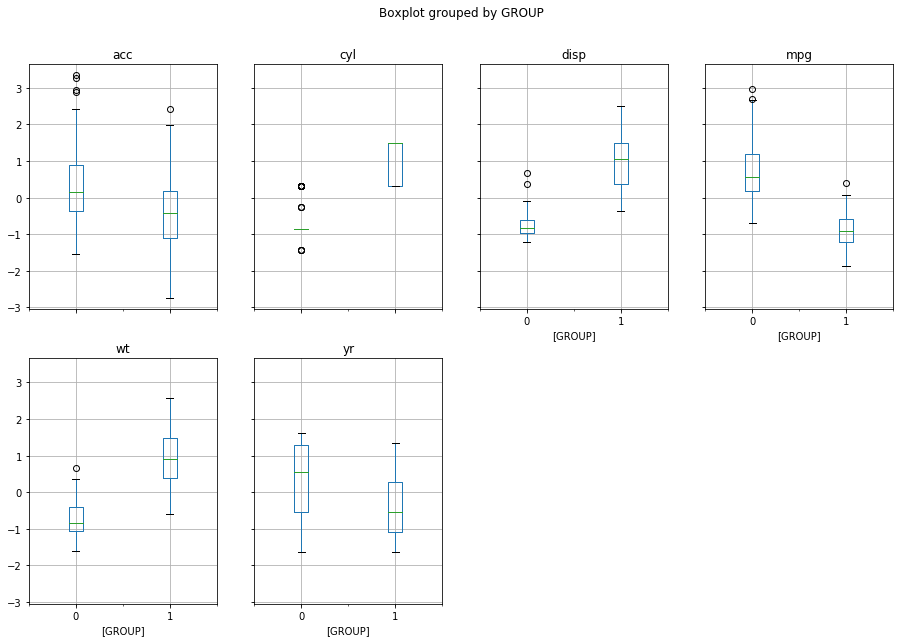

In [172]:
cars.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))

In [111]:
# The K = 2 boxplot clearly shows outliers in group 1. Indicating that the group 1 is stretched
# indicating probability of another cluster. Let us try with K = 3, the next elbow point

In [248]:
# Let us first start with K = 3
final_model3=KMeans(3)
final_model3.fit(cars2)
prediction=final_model3.predict(cars2)

#Append the prediction 
cars["GROUP"] = prediction
print("Groups Assigned : \n")
k4=cars[["car name", "GROUP"]]

k4


Groups Assigned : 



,car name,GROUP
0,chevrolet chevelle malibu,1
1,buick skylark 320,1
2,plymouth satellite,1
3,amc rebel sst,1
4,ford torino,1
5,ford galaxie 500,1
6,chevrolet impala,1
7,plymouth fury iii,1
8,pontiac catalina,1
9,amc ambassador dpl,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AF3D5B2D30>,
      dtype=object)

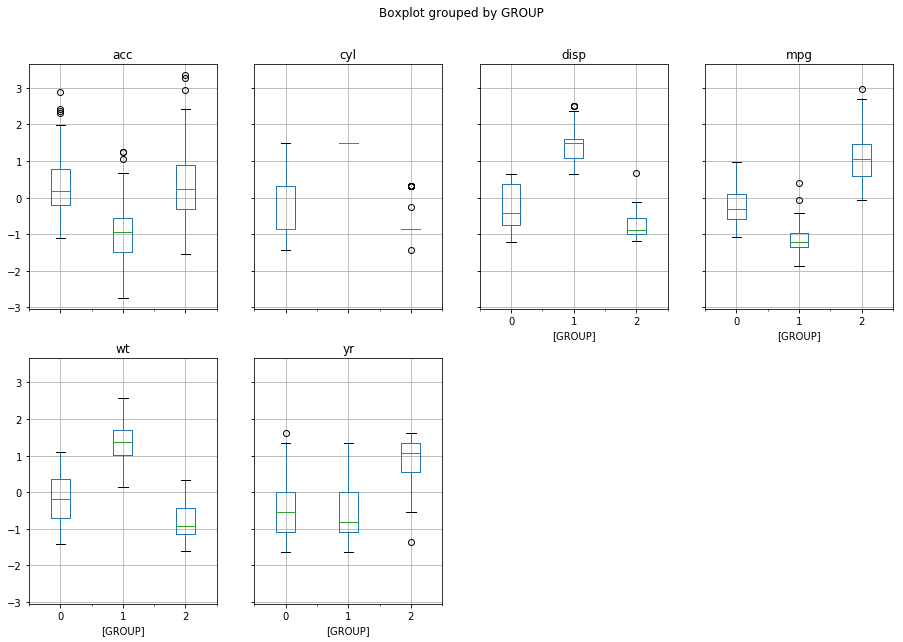

In [249]:
cars.boxplot(by='GROUP',layout=(2,4),figsize=(15,10))

In [112]:
#Analyzing in terms of k = 4 seems to give a better segregation of the technical support tickets than K=2. 
#The boxes are tighter indicating the spread of data is much less in K = 3 than in K = 2 and there are no outliers!

## 4.Use linear regression model on different clusters separately and print the coefficients of the models individually

In [245]:
# Dividing the dataset based on the opt cluster of 3
Cluster_1=cars[cars["GROUP"]==0]
Cluster_2=cars[cars["GROUP"]==1]
Cluster_3=cars[cars["GROUP"]==2]

In [246]:
#To print the  records exist clsuter wise
print("Cluster 1:",Cluster_1.shape)


Cluster 1: (100, 8)


In [247]:
print("Cluster 2:",Cluster_2.shape)

Cluster 2: (94, 8)


In [250]:
print("Cluster 3:",Cluster_3.shape)

Cluster 3: (119, 8)


In [252]:
Cluster_1X=Cluster_1.drop(columns=["GROUP","mpg"],axis=1)
Cluster_1Y=Cluster_1["mpg"]
Cluster_2X=Cluster_2.drop(columns=["GROUP","mpg"],axis=1)
Cluster_2Y=Cluster_2["mpg"]
Cluster_3X=Cluster_3.drop(columns=["GROUP","mpg"],axis=1)
Cluster_3Y=Cluster_3["mpg"]

In [253]:
from sklearn.linear_model import LinearRegression

cars_LiReg1 = LinearRegression()
cars_LiReg2 = LinearRegression()
cars_LiReg3 = LinearRegression()

In [255]:
cars_LiReg1.fit(Cluster_1X,Cluster_1Y)
cars_LiReg2.fit(Cluster_2X,Cluster_2Y)
cars_LiReg3.fit(Cluster_3X,Cluster_3Y)

ValueError: could not convert string to float: 'toyota corona mark ii'